Ce notebook présente la résolution de différents exercices dans le cadre du TP de l'électif introduction au processus stochastique à centrale Méditéranée et à été réalisé par Thomas Roujou

In [ ]:
P=[[0.5,0.5][0.75,0.25]]
E=[0,1]
Xo=[0]

In [ ]:
import numpy as np
from scipy.linalg import solve

# Matrice de transition
P = np.array([[1/2, 1/2],
              [1/4, 3/4]])


état = 0
n = 100
états = [état]
prop=0
for i in range(n - 1):
    état = np.random.choice([0, 1], p=P[état])
    états.append(état)
    prop+= état/n


print(prop,états[:100])

def distribution_stationnaire(A):
    n = A.shape[0]
    I = np.eye(n)
    AT = A.T
    mat = AT - I


    mat[-1, :] = 1
    b = np.zeros(n)
    b[-1] = 1
    pi = np.linalg.solve(mat, b)
    return pi

A = np.array([
    [0.5, 0.5],
    [0.25, 0.75]
])


pi = distribution_stationnaire(A)

# Affichage
print("Matrice de transition A :")
print(A)
print("\nDistribution stationnaire π :")
print(pi)



0.6900000000000004 [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]
Matrice de transition A :
[[0.5  0.5 ]
 [0.25 0.75]]

Distribution stationnaire π :
[0.33333333 0.66666667]


on retrouve la loi stationnaire que l'on obtient via l'équation $\pi*P=\pi$
ce qui donne $\pi1=2/3$ et $\pi0 = 1/3$

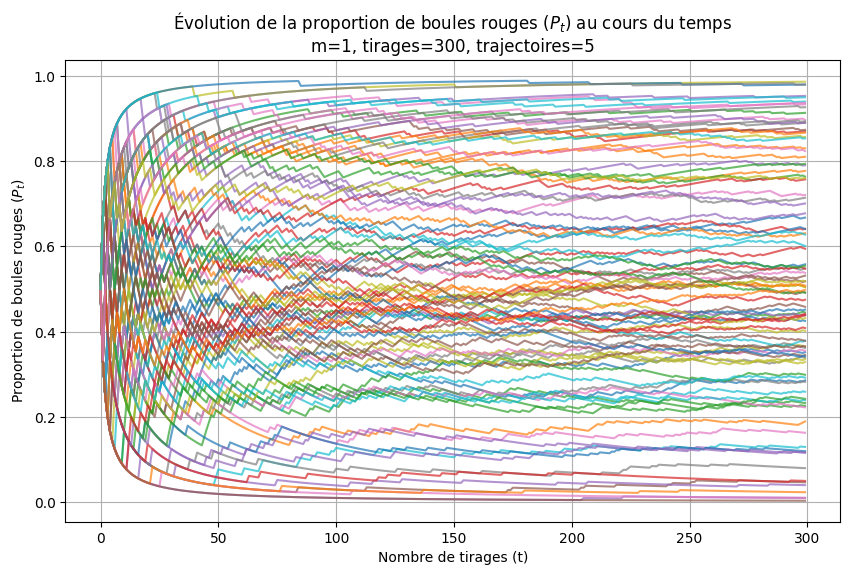

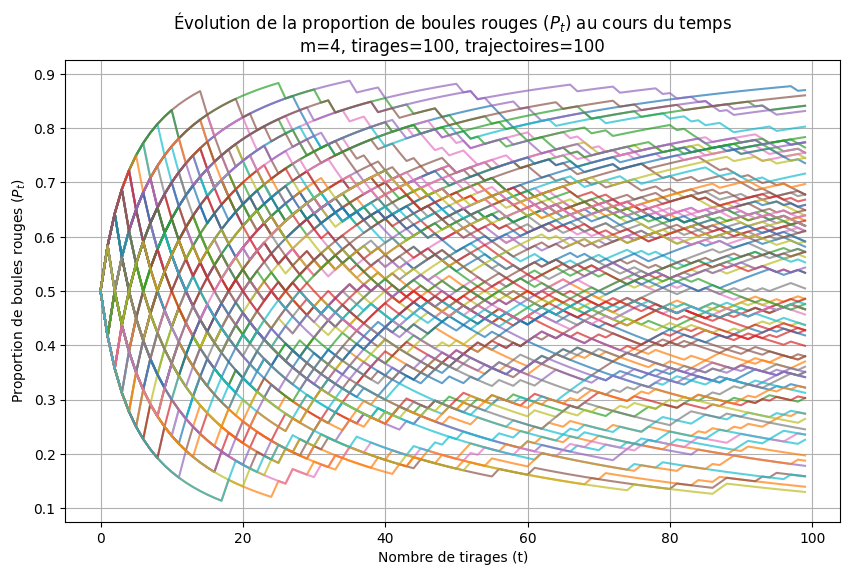

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Polya_Urne(m, tirages, trajectoires, rouge, blanche):
    toutes_trajectoires = []
    dernière_valeur=[]
    for i in range(trajectoires):
        rouge_i = rouge
        blanche_i = blanche
        proportions = []
        for j in range(tirages):
            total = rouge_i + blanche_i
            proportion_rouge = rouge_i / total  # Probabilité de tirer une boule rouge
            proportions.append(proportion_rouge)
            if np.random.rand() < proportion_rouge:
                rouge_i += m  # Ajouter m boules rouges

            else:
                blanche_i += m  # Ajouter m boules blanches

        toutes_trajectoires.append(proportions)

    return np.array(toutes_trajectoires)


# Paramètres
tirages = 100  # Nombre de tirages
trajectoires = 5  # Nombre de trajectoires simulées
rouge_initial = 1  # Nombre initial de boules rouges
blanche_initial = 1  # Nombre initial de boules blanches

evolutions1 = Polya_Urne(1, 300, 100, rouge_initial, blanche_initial)
evolutions2 = Polya_Urne(4, tirages, 100, 10, 10)

plt.figure(figsize=(10, 6))
for evolution in evolutions1:
    plt.plot(evolution, alpha=0.7)
plt.title(f"Évolution de la proportion de boules rouges ($P_t$) au cours du temps\nm={1}, tirages={300}, trajectoires={trajectoires}")
plt.xlabel("Nombre de tirages (t)")
plt.ylabel("Proportion de boules rouges ($P_t$)")
plt.grid()
plt.show()

# Affichage des trajectoires
plt.figure(figsize=(10, 6))
for evolution in evolutions2:
    plt.plot(evolution, alpha=0.7)
plt.title(f"Évolution de la proportion de boules rouges ($P_t$) au cours du temps\nm={4}, tirages={tirages}, trajectoires={100}")
plt.xlabel("Nombre de tirages (t)")
plt.ylabel("Proportion de boules rouges ($P_t$)")
plt.grid()
plt.show()


pour m=1 on a à la fin de la trajectoire une réalisation de loi uniforme en en trancant beaucoup par exemple 1000 on voit que l'on atteidn grossomodo toutes les valeurs entres 0 et 1 on peut aussi tracer une histogramme des dernière valeurs
si on augmente par exemple le nombre de boules rouges dans la plupart des cas on converge vers 1

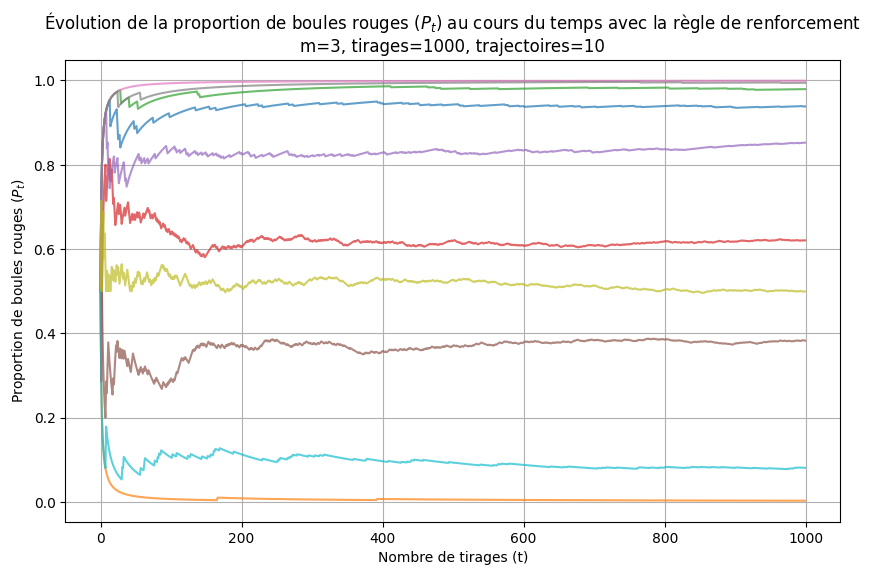

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Polya_Urne2(m, tirages, trajectoires, rouge, blanche):
    toutes_trajectoires = []
    for i in range(trajectoires):
        rouge_i = rouge
        blanche_i = blanche
        proportions = []
        for j in range(tirages):
            total = rouge_i + blanche_i
            proportion_rouge = rouge_i / total  # Probabilité de tirer une boule rouge
            proportions.append(proportion_rouge)
            if np.random.rand() < proportion_rouge:
                rouge_i += m
                blanche_i +=1  # Ajouter m boules rouges et une blanche
            else:
                blanche_i += m
                rouge_i +=m  # Ajouter m boules blanches et une rouge

        toutes_trajectoires.append(proportions)

    return np.array(toutes_trajectoires)

# Paramètres
tirages = 1000  # Nombre de tirages
trajectoires2 = 10  # Nombre de trajectoires simulées
rouge_initial = 1  # Nombre initial de boules rouges
rouge_initial = 2  # Nombre initial de boules blanches
    # Affichage des trajectoires
plt.figure(figsize=(10, 6))

evolutions = Polya_Urne(3, tirages, 10, rouge_initial,rouge_initial )
for evolution in evolutions:
    plt.plot(evolution, alpha=0.7)
plt.title(f"Évolution de la proportion de boules rouges ($P_t$) au cours du temps avec la règle de renforcement \nm={3}, tirages={tirages}, trajectoires={trajectoires2}")
plt.xlabel("Nombre de tirages (t)")
plt.ylabel("Proportion de boules rouges ($P_t$)")
plt.grid()
plt.show()


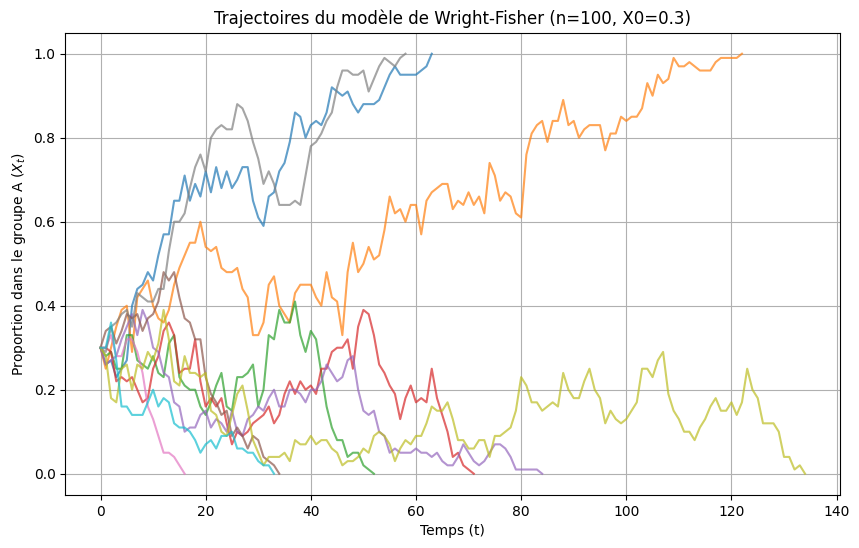

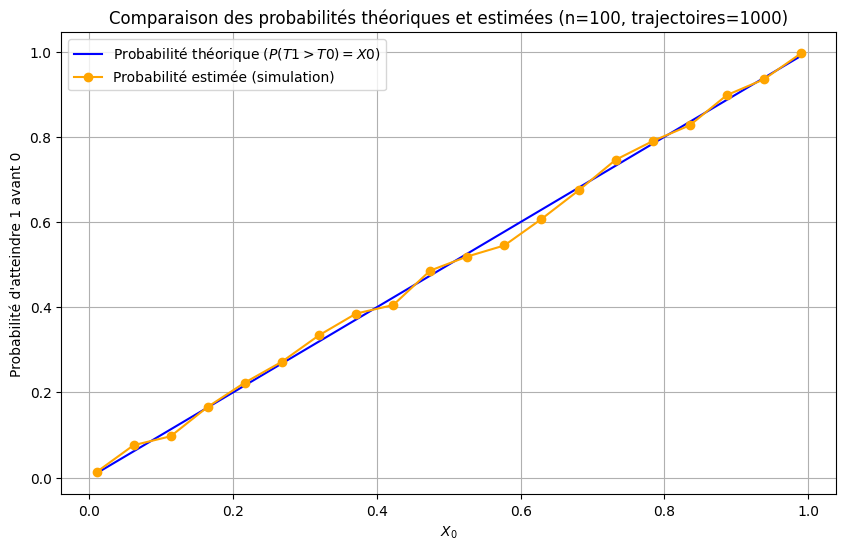

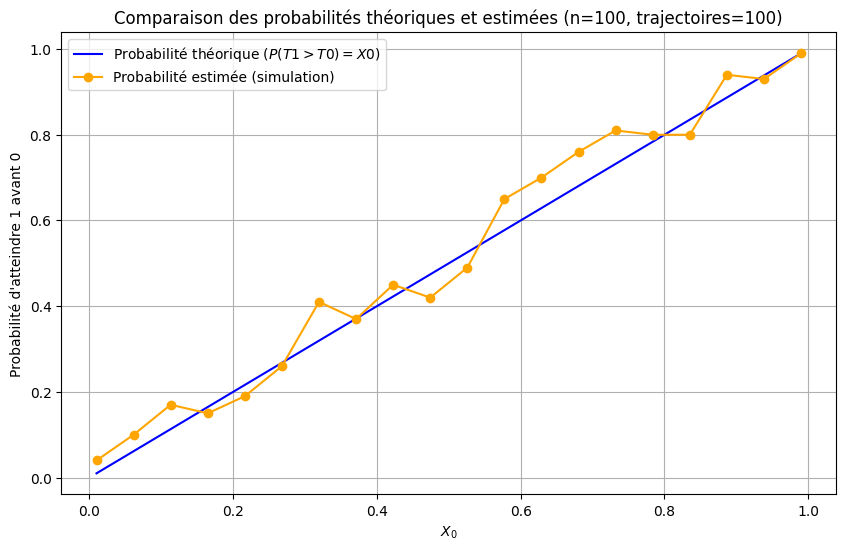

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_trajectoires_wright_fisher(n, X0, t_max, n_trajectoires):
    trajectoires = []
    for i in range(n_trajectoires):
        X_t = X0
        trajectoire = [X_t]
        for _ in range(t_max):
            X_t = np.random.binomial(n, X_t) / n  # Loi binomiale
            trajectoire.append(X_t)
            if X_t == 0 or X_t == 1:  # Extinction ou fixation
                break
        trajectoires.append(trajectoire)
    return trajectoires


def estimer_probabilite(n, X0, t_max, n_trajectoires):
    atteint_1_avant_0 = 0
    for i in range(n_trajectoires):
        X_t = X0
        for j in range(t_max):
            X_t = np.random.binomial(n, X_t) / n
            if X_t == 1:  # Fixation dans le groupe A
                atteint_1_avant_0 += 1
                break
            elif X_t == 0:  # Extinction du groupe A
                break
    return atteint_1_avant_0 / n_trajectoires



n = 100
X0 = 0.3  # Proportion initiale dans le groupe A
t_max = 1000
n_trajectoires = 1000

# 1. Simulation et affichage des trajectoires
trajectoires = simuler_trajectoires_wright_fisher(n, X0, t_max, n_trajectoires)

plt.figure(figsize=(10, 6))
for trajectoire in trajectoires[:10]:
    plt.plot(trajectoire, alpha=0.7)
plt.title(f"Trajectoires du modèle de Wright-Fisher (n={n}, X0={X0})")
plt.xlabel("Temps (t)")
plt.ylabel("Proportion dans le groupe A ($X_t$)")
plt.grid()
plt.show()

# 2. Comparaison des probabilités théoriques et estimées
X0_values = np.linspace(0.01, 0.99, 20)  # Différentes valeurs initiales de X0
probs_theoriques = X0_values  # P(T1 > T0) = X0
probs_estimees = [estimer_probabilite(n, X0, t_max, n_trajectoires) for X0 in X0_values]

plt.figure(figsize=(10, 6))
plt.plot(X0_values, probs_theoriques, label="Probabilité théorique ($P(T1 > T0) = X0$)", color="blue")
plt.plot(X0_values, probs_estimees, 'o-', label="Probabilité estimée (simulation)", color="orange")
plt.title(f"Comparaison des probabilités théoriques et estimées (n={n}, trajectoires={n_trajectoires})")
plt.xlabel("$X_0$")
plt.ylabel("Probabilité d'atteindre 1 avant 0")
plt.legend()
plt.grid()
plt.show()

X0_values = np.linspace(0.01, 0.99, 20)  # Différentes valeurs initiales de X0
probs_theoriques = X0_values  # P(T1 > T0) = X0
probs_estimees = [estimer_probabilite(n, X0, t_max, 100) for X0 in X0_values]

plt.figure(figsize=(10, 6))
plt.plot(X0_values, probs_theoriques, label="Probabilité théorique ($P(T1 > T0) = X0$)", color="blue")
plt.plot(X0_values, probs_estimees, 'o-', label="Probabilité estimée (simulation)", color="orange")
plt.title(f"Comparaison des probabilités théoriques et estimées (n={n}, trajectoires={100})")
plt.xlabel("$X_0$")
plt.ylabel("Probabilité d'atteindre 1 avant 0")
plt.legend()
plt.grid()
plt.show()


on simule différente valeur de Xo, pour 100 trajectoires la corrélation n'est pas si évidente avec la valeur de la probabilité d'extinction de A avant B mais dès que l'on passe à 1000 trajectoires la corrélation est beaucoup plus évidente

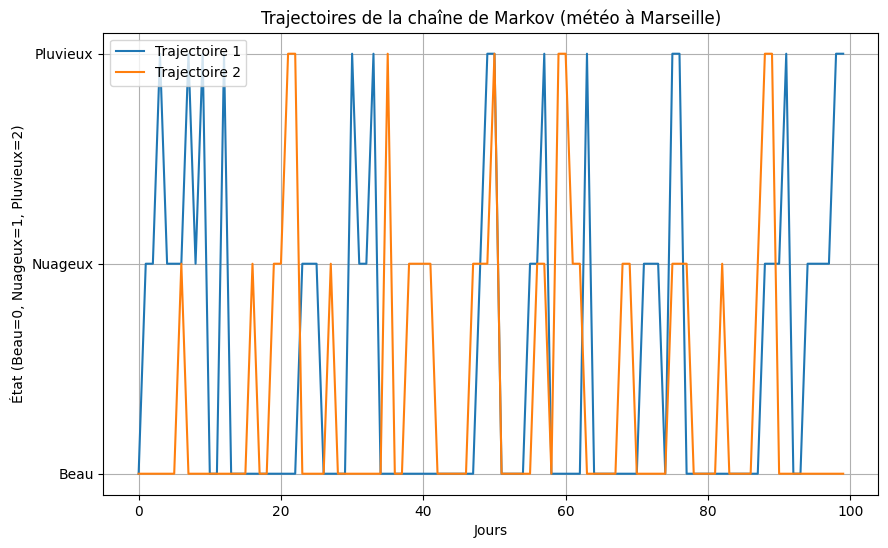

In [ ]:
#exercice4
M=np.array([[0.8,0.15,0.05],[0.25,0.5,0.25],[0.5,0.25,0.25]])

etats = ["Beau", "Nuageux", "Pluvieux"]

def simuler_trajectoire(M, etats, etat_initial,jours):
    etat_courant = etat_initial
    trajectoire = [etat_courant]

    for i in range(n - 1):
        etat_courant = np.random.choice(etats, p=M[etats.index(etat_courant)])
        trajectoire.append(etat_courant)

    return trajectoire

jours = 100
n_trajectoires = 2
etat_initial = "Beau"
trajectoires = [simuler_trajectoire(M, etats, etat_initial, jours) for i in range(n_trajectoires)]

plt.figure(figsize=(10, 6))
for i, trajectoire in enumerate(trajectoires):
    plt.plot(trajectoire, label=f"Trajectoire {i+1}")
plt.title("Trajectoires de la chaîne de Markov (météo à Marseille)")
plt.xlabel("Jours")
plt.ylabel("État (Beau=0, Nuageux=1, Pluvieux=2)")
plt.yticks([0, 1, 2], etats)
plt.grid()
plt.legend()
plt.show()

calculons désormais $\pi*P=\pi$
avec $P= [[0.8,0.15,0.05],[0.25,0.5,0.25],[0.5,0.25,0.25]]$


In [ ]:
def distribution_stationnaire(A):
    n = A.shape[0]
    I = np.eye(n)
    AT = A.T
    mat = AT - I


    mat[-1, :] = 1
    b = np.zeros(n)
    b[-1] = 1
    pi = np.linalg.solve(mat, b)
    return pi

A=np.array([[0.8,0.15,0.05],[0.25,0.5,0.25],[0.5,0.25,0.25]])

distribution_stationnaire(A)

array([0.625, 0.25 , 0.125])

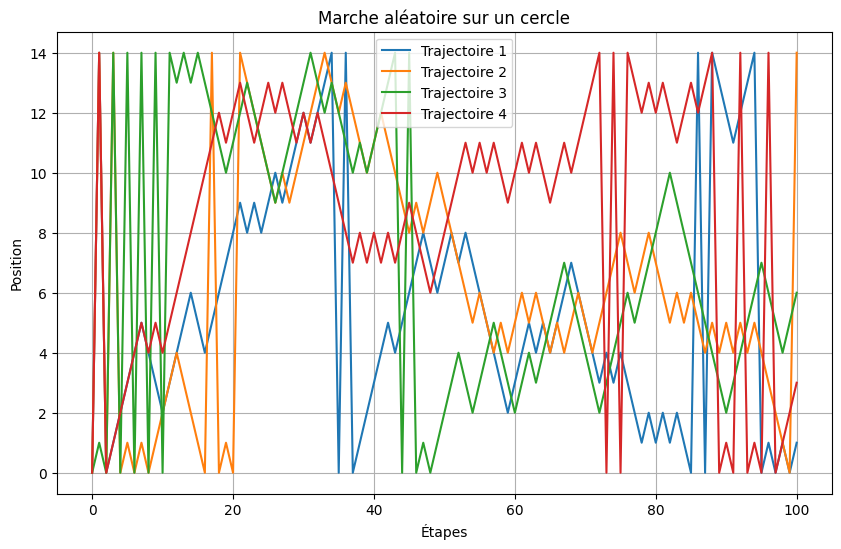

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_trajectoire(L, n_etapes, n_trajectoires=1):
    trajectoires = []
    for i in range(n_trajectoires):
        trajectoire = [0]  # La trajectoire commence à x = 0
        for j in range(n_etapes):
            pas = np.random.choice([-1, 1])  # Déplacement à gauche ou à droite
            nouvelle_position = (trajectoire[-1] + pas) % L  # Modulo pour rester sur le cercle
            trajectoire.append(nouvelle_position)
        trajectoires.append(np.array(trajectoire))
    return trajectoires

def simuler_marche_aleatoire_cercle(L, etapes, depart=0):
    trajectoire = [depart]
    for i in range(etapes):
        mouvement = np.random.choice([-1, 1])
        position_suivante = (trajectoire[-1] + mouvement) % L
        trajectoire.append(position_suivante)
    return trajectoire

def tracer_trajectoires(trajectoires):
    plt.figure(figsize=(10, 6))
    for i, trajectoire in enumerate(trajectoires):
        plt.plot(trajectoire, label=f'Trajectoire {i+1}')
    plt.xlabel('Étapes')
    plt.ylabel('Position')
    plt.title('Marche aléatoire sur un cercle')
    plt.legend()
    plt.grid()
    plt.show()

# Simulation de quelques trajectoires
L = 15  # Taille du cercle
n_etapes = 100  # Nombre d'étapes
n_trajectoires = 4  # Nombre de trajectoires

trajectoires = simuler_trajectoire(L, n_etapes, n_trajectoires)
tracer_trajectoires(trajectoires)


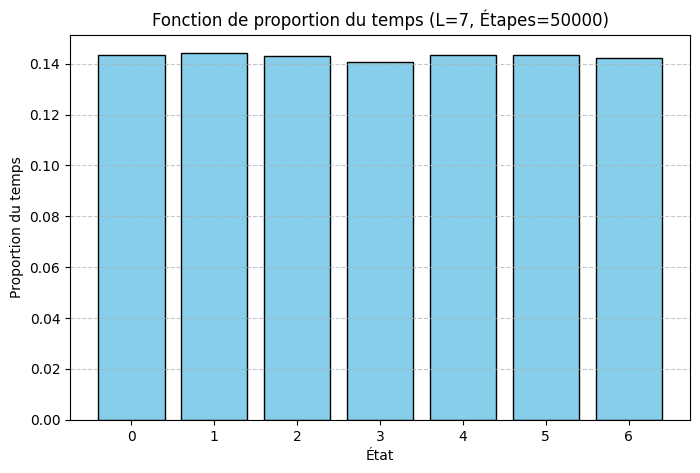

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_marche_aleatoire_cercle(L, etapes, depart=0):
    trajectoire = [depart]
    for i in range(etapes):
        mouvement = np.random.choice([-1, 1])
        position_suivante = (trajectoire[-1] + mouvement) % L
        trajectoire.append(position_suivante)
    return trajectoire

def calculer_proportion_temps(trajectoire, L):
    comptes = np.zeros(L)
    for etat in trajectoire:
        comptes[etat] += 1
    return comptes / len(trajectoire)

# Paramètres
L = 7  # Taille du cercle
etapes = 50000  # Nombre d'étapes
depart = 0  # Position initiale

trajectoire = simuler_marche_aleatoire_cercle(L, etapes, depart)

proportions_temps = calculer_proportion_temps(trajectoire, L)

# Tracer la fonction de proportion du temps
plt.figure(figsize=(8, 5))
plt.bar(range(L), proportions_temps, color='skyblue', edgecolor='black')
plt.title(f"Fonction de proportion du temps (L={L}, Étapes={etapes})")
plt.xlabel("État")
plt.ylabel("Proportion du temps")
plt.xticks(range(L))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Pour montrer que, pour $ L $ pair, $$ \lim_{t \to \infty} P_x(X_t = y) = \frac{1}{L} $$ pour tout $ y $, examinons les prop de la chaine de Markov :

La chaine de Markov est irreductible car, pour tout $ L $, il est possible d'atteindre n'importe quel etat $ y $ à partir de n'importe quel $ x $. Cela resulte de la nature du mouvement à gauche ou à droite, avec retour circulaire.

  
   

     
L'espace $ E = \{0, 1, \dots, L-1\} $ est fini, ce qui garantit l'existence d'une distribution stationnaire unique la chaine de markov est irréductible.



La matrice de transition pour la marche aleatoire sur le cercle est donnee par :
$$
P_{x,x+1} = \frac{1}{2}, \quad P_{x,x-1} = \frac{1}{2}, \quad \text{avec } P_{L-1,0} = \frac{1}{2} \text{ et } P_{0,L-1} = \frac{1}{2}.
$$



Le processus est symetrique. Les probabilites de transition entre etats voisins sont identiques dans les deux directions.

La distribution stationnaire $$ \pi = (\pi_0, \pi_1, \dots, \pi_{L-1}) $$ satisfait :
$$\pi P = \pi.$$
En utilisant la symetrie et la normalisation $$ \sum_{x=0}^{L-1} \pi_x = 1$$, il est clair que :
   $$\pi_x = \frac{1}{L}, \quad \text{pour tout } x \in \{0, 1, \dots, L-1\}$$

étant donné que la chaine est irreductible, récurrente et possede un espace d'etats fini, le theoreme ergodique garantit que :
$$lim_{t \to \infty} P_x(X_t = y) = \pi_y = \frac{1}{L}, \quad \text{pour tout } x, y.$$




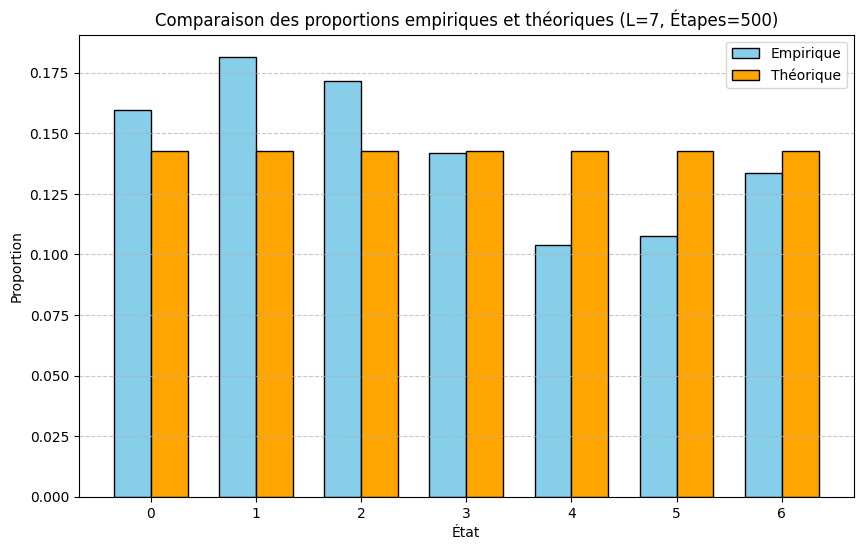

Proportions empiriques : [0.15968064 0.18163673 0.17165669 0.14171657 0.10379242 0.10778443
 0.13373253]
Proportions théoriques : [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_marche_aleatoire_cercle(L, etapes, depart=0):
    trajectoire = [depart]
    for i in range(etapes):
        mouvement = np.random.choice([-1, 1])  # Pas à gauche ou à droite
        position_suivante = (trajectoire[-1] + mouvement) % L  # Retour circulaire
        trajectoire.append(position_suivante)
    return trajectoire

def calculer_proportion_temps(trajectoire, L):
    """Calcule la proportion de temps passée dans chaque état sur le cercle."""
    comptes = np.zeros(L)  # Compte le nombre de visites dans chaque état
    for etat in trajectoire:
        comptes[etat] += 1
    return comptes / len(trajectoire)  # Normalise par le nombre total d'étapes

def distribution_stationnaire_theorique(L):
    """Renvoie la distribution stationnaire théorique pour une marche aléatoire circulaire."""
    return np.ones(L) / L  # Distribution uniforme

# Paramètres
L = 7  # Taille impaire du cercle
etapes = 500  # Nombre d'étapes
depart = 0  # Position initiale

# Simuler la trajectoire
trajectoire = simuler_marche_aleatoire_cercle(L, etapes, depart)

# Calculer la proportion empirique et théorique
proportions_temps = calculer_proportion_temps(trajectoire, L)
proportions_theoriques = distribution_stationnaire_theorique(L)

# Comparaison graphique des proportions empiriques et théoriques
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(L)

# Proportions empiriques
plt.bar(x - bar_width / 2, proportions_temps, bar_width, label="Empirique", color="skyblue", edgecolor="black")
# Proportions théoriques
plt.bar(x + bar_width / 2, proportions_theoriques, bar_width, label="Théorique", color="orange", edgecolor="black")

plt.title(f"Comparaison des proportions empiriques et théoriques (L={L}, Étapes={etapes})")
plt.xlabel("État")
plt.ylabel("Proportion")
plt.xticks(range(L))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Afficher les proportions empiriques et théoriques
print(f"Proportions empiriques : {proportions_temps}")
print(f"Proportions théoriques : {proportions_theoriques}")



évidemment comme pour toute simulation de ce genre il faut beaucoup plus de marge pour tendre de façon plus concrète vers nos valeurs théoriques

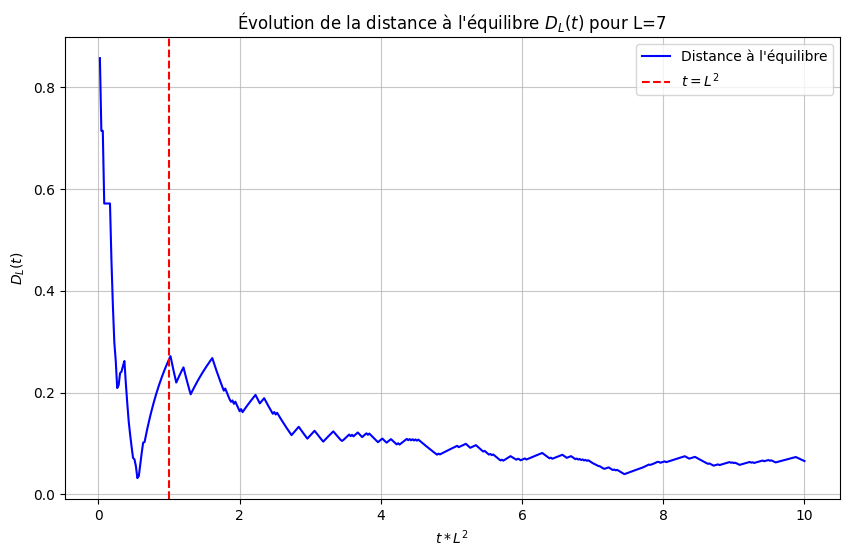

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_marche_aleatoire_cercle(L, etapes, depart=0):
    trajectoire = [depart]
    for _ in range(etapes):
        mouvement = np.random.choice([-1, 1])  # Pas à gauche ou à droite
        position_suivante = (trajectoire[-1] + mouvement) % L  # Retour circulaire
        trajectoire.append(position_suivante)
    return trajectoire

def calculer_proportion_temps(trajectoire, L):
    comptes = np.zeros(L)  # Compte le nombre de visites dans chaque état
    for etat in trajectoire:
        comptes[etat] += 1
    return comptes / len(trajectoire)

def calculer_distance_equilibre(L, t_max, trajectoire):
    proportions_theoriques = np.ones(L) / L  # Distribution stationnaire uniforme
    distances = []

    for t in range(1, t_max + 1):
        # Calculer la distribution empirique pour les t premières étapes
        distribution_empirique = calculer_proportion_temps(trajectoire[:t], L)
        # Calculer la distance à l'équilibre D_L(t)
        distance = 0.5 * np.sum(np.abs(distribution_empirique - proportions_theoriques))
        distances.append(distance)

    return distances

# Paramètres
L = 7  # Taille impaire du cercle
t_max = 10 * L**2  # Temps maximal d'évolution (>> L^2 pour tester le comportement)
depart = 0  # Position initiale

# Simuler une longue trajectoire
trajectoire_longue = simuler_marche_aleatoire_cercle(L, t_max, depart)

# Calculer la distance à l'équilibre pour chaque instant t
distances_equilibre = calculer_distance_equilibre(L, t_max, trajectoire_longue)

# Normalisation du temps par L^2 pour tracer la courbe
temps_normalises = np.arange(1, t_max + 1) / (L**2)

# Tracer la courbe de D_L(t)
plt.figure(figsize=(10, 6))
plt.plot(temps_normalises, distances_equilibre, label="Distance à l'équilibre", color="blue")
plt.axvline(1, color="red", linestyle="--", label="$t = L^2$")  # Ligne verticale pour t = L^2
plt.title(f"Évolution de la distance à l'équilibre $D_L(t)$ pour L={L}")
plt.xlabel("$t * L^2$")
plt.ylabel("$D_L(t)$")
plt.legend()
plt.grid(alpha=0.7)
plt.show()


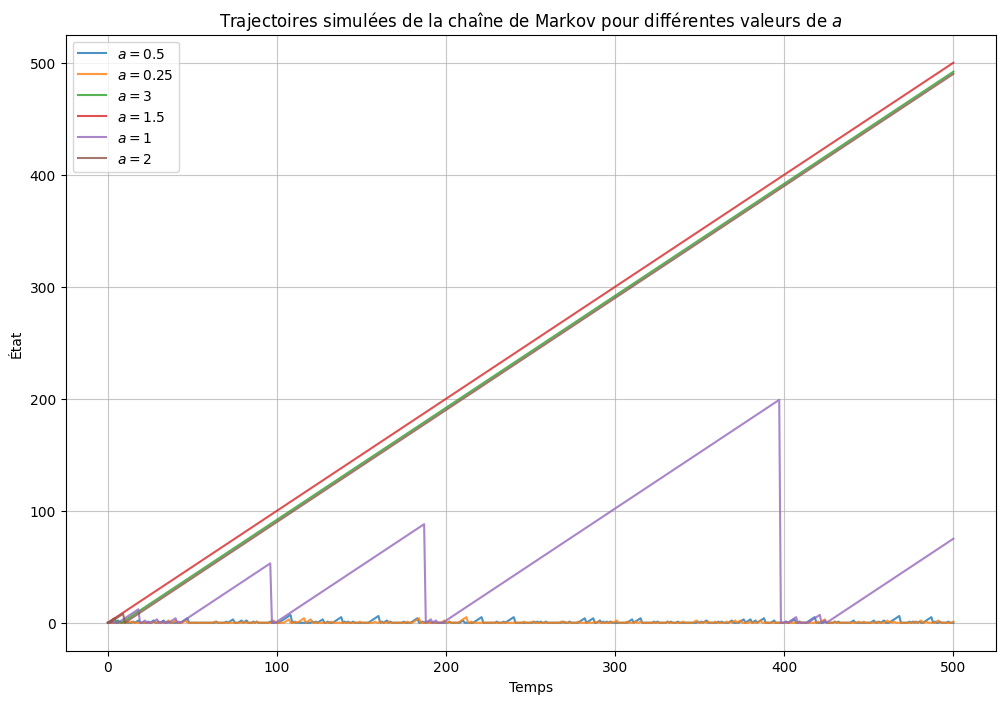

In [ ]:
#exercice 6

import numpy as np
import matplotlib.pyplot as plt

def simuler_chaine_markov(a, etapes, x0=0):
    trajectoire = [x0]
    for i in range(etapes):
        x = trajectoire[-1]
        p_x = 1 - 1 / ((x + 2) ** a)  # Probabilité de passer à x + 1
        if np.random.rand() < p_x:
            trajectoire.append(x + 1)  # Transition vers x + 1
        else:
            trajectoire.append(0)  # Retour à 0
    return trajectoire

# Paramètres de la simulation
etapes = 500  # Nombre d'étapes
x0 = 0  # État initial

# Simulation pour différentes valeurs de a
valeurs_a = [0.5,0.25,3,1.5, 1, 2]  # Différentes valeurs de a pour tester
trajectoires = {a: simuler_chaine_markov(a, etapes, x0) for a in valeurs_a}

# Tracer les trajectoires
plt.figure(figsize=(12, 8))
for a, trajectoire in trajectoires.items():
    plt.plot(range(etapes + 1), trajectoire, label=f"$a = {a}$", alpha=0.8)
plt.title("Trajectoires simulées de la chaîne de Markov pour différentes valeurs de $a$")
plt.xlabel("Temps")
plt.ylabel("État")
plt.legend()
plt.grid(alpha=0.7)
plt.show()


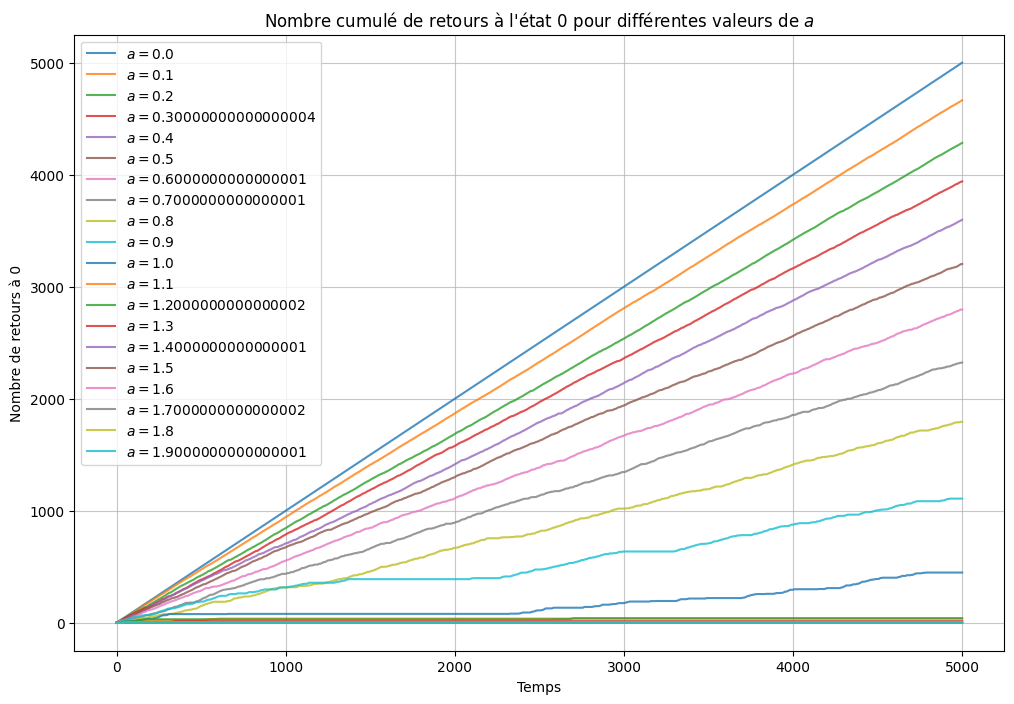

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_chaine_markov(a, etapes, x0=0):
    trajectoire = [x0]
    for _ in range(etapes):
        x = trajectoire[-1]
        p_x = 1 - 1 / ((x + 2) ** a)  # Probabilité de passer à x + 1
        if np.random.rand() < p_x:
            trajectoire.append(x + 1)  # Transition vers x + 1
        else:
            trajectoire.append(0)  # Retour à 0
    return trajectoire

def compter_retours_a_zero(trajectoire):
    retours_cumules = []
    compteur = 0
    for etat in trajectoire:
        if etat == 0:
            compteur += 1
        retours_cumules.append(compteur)
    return retours_cumules

# Paramètres
etapes = 5000  # Nombre d'étapes pour une analyse long-terme
x0 = 0  # État initial
valeurs_a = [0.1* i for i in range(20)]  # Différentes valeurs de a pour tester la récurrence

# Simulation des trajectoires pour différentes valeurs de a
trajectoires_longues = {a: simuler_chaine_markov(a, etapes, x0) for a in valeurs_a}

# Calcul des retours cumulés à 0 pour chaque trajectoire
retours = {a: compter_retours_a_zero(trajectoire) for a, trajectoire in trajectoires_longues.items()}

plt.figure(figsize=(12, 8))
for a, retours_a_zero in retours.items():
    plt.plot(range(etapes + 1), retours_a_zero, label=f"$a = {a}$", alpha=0.8)
plt.title("Nombre cumulé de retours à l'état 0 pour différentes valeurs de $a$")
plt.xlabel("Temps")
plt.ylabel("Nombre de retours à 0")
plt.legend()
plt.grid(alpha=0.7)
plt.show()


pour a>1 on perd la récurrence du processus d'après cette simulation la chaine est alors transciente